In [1]:
pip install pyspark pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [5]:
superstore = spark.read.format('csv').option('header','true').load('/Users/S546518/Desktop/Academics/Semester4/BigData/Project/SuperstoreSales.csv')
superstore = superstore.withColumnRenamed('Row ID','Row_ID').withColumnRenamed('Order ID','Order_ID').withColumnRenamed('Order Date','Order_Date').withColumnRenamed('Ship Date','Ship_Date').withColumnRenamed('Sub-Category','Sub_Category')
superstore = superstore.withColumnRenamed('Ship Mode','Ship_Mode').withColumnRenamed('Customer ID','Customer_ID').withColumnRenamed('Customer Name','Customer_Name').withColumnRenamed('Postal Code','Postal_Code').withColumnRenamed('Product Name','Product_Name').withColumnRenamed('Shipping Cost','Shipping_Cost').withColumnRenamed('Order Priority','Order_Priority')
superstore.createOrReplaceTempView('store')
superstore.show()
display(superstore)

+------+---------------+----------+---------+--------------+-----------+-----------------+-----------+-------------+----------------+-------------+-----------+------+------------+----------------+---------------+------------+--------------------+-------+--------+--------+-------+-------------+--------------+
|Row_ID|       Order_ID|Order_Date|Ship_Date|     Ship_Mode|Customer_ID|    Customer_Name|    Segment|         City|           State|      Country|Postal_Code|Market|      Region|      Product ID|       Category|Sub_Category|        Product_Name|  Sales|Quantity|Discount| Profit|Shipping_Cost|Order_Priority|
+------+---------------+----------+---------+--------------+-----------+-----------------+-----------+-------------+----------------+-------------+-----------+------+------------+----------------+---------------+------------+--------------------+-------+--------+--------+-------+-------------+--------------+
| 42433|   AG-2011-2040|  1/1/2011| 6/1/2011|Standard Class|   TB-1128

DataFrame[Row_ID: string, Order_ID: string, Order_Date: string, Ship_Date: string, Ship_Mode: string, Customer_ID: string, Customer_Name: string, Segment: string, City: string, State: string, Country: string, Postal_Code: string, Market: string, Region: string, Product ID: string, Category: string, Sub_Category: string, Product_Name: string, Sales: string, Quantity: string, Discount: string, Profit: string, Shipping_Cost: string, Order_Priority: string]

In [6]:
#Changing datatypes into useable format
from pyspark.sql.types import IntegerType,BooleanType,DoubleType,DateType
superstore = superstore.withColumn("Row_ID",superstore.Row_ID.cast(IntegerType()))
superstore = superstore.withColumn("Order_ID",superstore.Order_ID.cast(IntegerType()))
superstore = superstore.withColumn("Postal_Code",superstore.Postal_Code.cast(IntegerType()))
superstore = superstore.withColumn("Sales",superstore.Sales.cast(DoubleType()))
superstore = superstore.withColumn("Quantity",superstore.Quantity.cast(IntegerType()))
superstore = superstore.withColumn("Discount",superstore.Discount.cast(DoubleType()))
superstore = superstore.withColumn("Profit",superstore.Profit.cast(DoubleType()))
superstore = superstore.withColumn("Shipping_Cost",superstore.Shipping_Cost.cast(DoubleType()))
superstore = superstore.withColumn("Ship_Date", superstore.Ship_Date.cast(DateType()))
display(superstore)

DataFrame[Row_ID: int, Order_ID: int, Order_Date: string, Ship_Date: date, Ship_Mode: string, Customer_ID: string, Customer_Name: string, Segment: string, City: string, State: string, Country: string, Postal_Code: int, Market: string, Region: string, Product ID: string, Category: string, Sub_Category: string, Product_Name: string, Sales: double, Quantity: int, Discount: double, Profit: double, Shipping_Cost: double, Order_Priority: string]

In [7]:
superstore = superstore.dropna()

In [8]:
#1.Find the total sales made by each customer segment
spark.sql('SELECT Segment, SUM(Sales) AS TotalSales FROM store GROUP BY Segment').show()

+-----------+------------------+
|    Segment|        TotalSales|
+-----------+------------------+
|   Consumer| 6496714.254859965|
|Home Office|2305880.9825599985|
|  Corporate|3815155.6684599956|
+-----------+------------------+



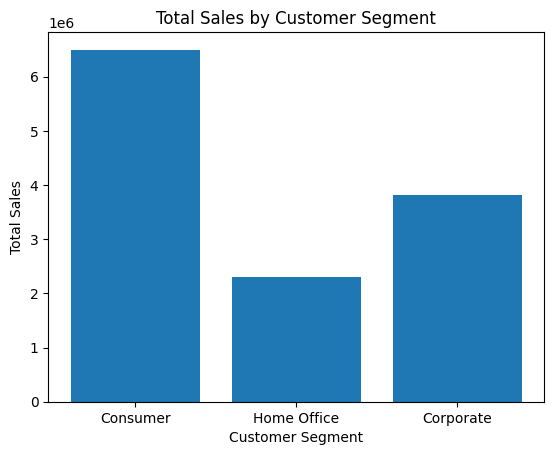

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# execute the Spark SQL query and store the results in a variable named "result_df"
result_df = spark.sql('SELECT Segment, SUM(Sales) AS TotalSales FROM store GROUP BY Segment')

# convert the Spark DataFrame to a Pandas DataFrame for visualization
pandas_df = result_df.toPandas()

# create a bar chart to visualize the total sales for each customer segment
plt.bar(pandas_df['Segment'], pandas_df['TotalSales'])
plt.title('Total Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.show()

In [9]:
#2.Find the top 5 most profitable products
spark.sql('SELECT * FROM store ORDER BY Profit DESC LIMIT 5').show()

+------+--------------+----------+----------+--------------+-----------+-------------------+-----------+--------------------+------------+-------------------+-----------+------+---------+---------------+---------------+------------+--------------------+-------+--------+--------+------+-------------+--------------+
|Row_ID|      Order_ID|Order_Date| Ship_Date|     Ship_Mode|Customer_ID|      Customer_Name|    Segment|                City|       State|            Country|Postal_Code|Market|   Region|     Product ID|       Category|Sub_Category|        Product_Name|  Sales|Quantity|Discount|Profit|Shipping_Cost|Order_Priority|
+------+--------------+----------+----------+--------------+-----------+-------------------+-----------+--------------------+------------+-------------------+-----------+------+---------+---------------+---------------+------------+--------------------+-------+--------+--------+------+-------------+--------------+
|  6006|MX-2011-109267|  5/1/2011|  9/1/2011|Standar

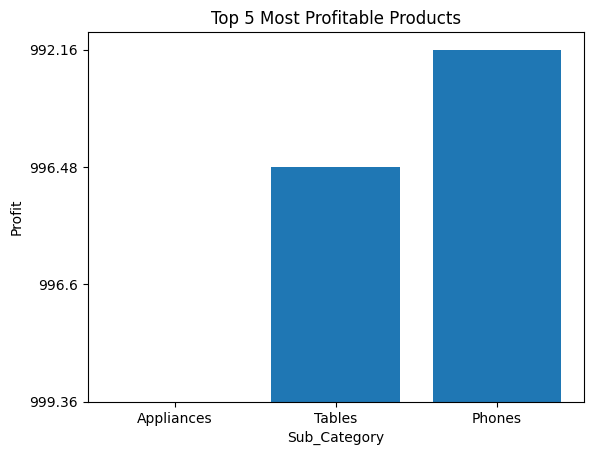

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import pyspark.sql.functions as F

# Execute the SQL query
result_df = spark.sql('SELECT Sub_Category, Profit FROM store ORDER BY Profit DESC LIMIT 5')

# Convert the result to a Pandas DataFrame
pandas_df = result_df.toPandas()

# Plot the data
plt.bar(pandas_df['Sub_Category'], pandas_df['Profit'])
plt.title('Top 5 Most Profitable Products')
plt.xlabel('Sub_Category')
plt.ylabel('Profit')
plt.show()

In [10]:
#3.Find the average shipping cost per order for each shipping mode
spark.sql('SELECT Ship_Mode, AVG(Shipping_Cost) AS AvgShippingCost FROM store GROUP BY Ship_Mode').show()

+--------------+------------------+
|     Ship_Mode|   AvgShippingCost|
+--------------+------------------+
|   First Class| 41.03307455029977|
|      Same Day| 42.79019433543131|
|  Second Class|30.489450480162965|
|Standard Class|  19.9786679220146|
+--------------+------------------+



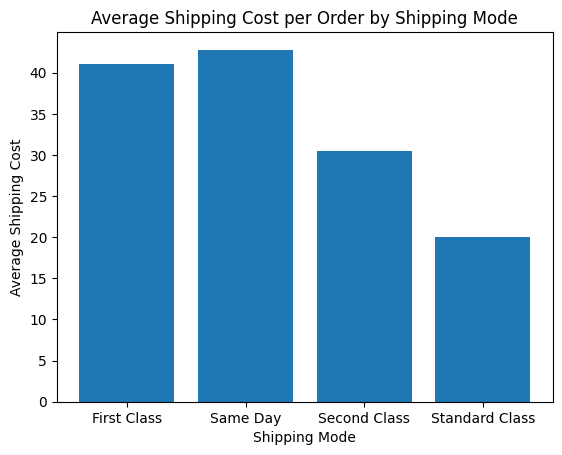

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import col

# Assuming you already have spark and store dataframe

# Run the SQL query and convert the resulting dataframe to pandas dataframe
df = spark.sql('SELECT Ship_Mode, AVG(Shipping_Cost) AS AvgShippingCost FROM store GROUP BY Ship_Mode').toPandas()

# Create a bar chart of the average shipping cost per order for each shipping mode
plt.bar(df['Ship_Mode'], df['AvgShippingCost'])
plt.title('Average Shipping Cost per Order by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Average Shipping Cost')
plt.show()

In [11]:
#4.Find the total number of orders shipped per country and region
spark.sql('SELECT Country, Region, COUNT(*) AS TotalOrders FROM store GROUP BY Country, Region').show()

+--------------------+------------+-----------+
|             Country|      Region|TotalOrders|
+--------------------+------------+-----------+
|               Niger|      Africa|         43|
|         Netherlands|     Central|        435|
|            Paraguay|       South|         12|
|            Pakistan|Central Asia|        249|
|               Libya|      Africa|         39|
|         New Zealand|     Oceania|        628|
|       United States|     Central|       2323|
|         Afghanistan|Central Asia|         55|
|             Germany|     Central|       2065|
|               Kenya|      Africa|         98|
|             Ecuador|       South|         56|
|             Tunisia|      Africa|         13|
|          Guadeloupe|   Caribbean|          8|
|            Ethiopia|      Africa|          7|
|          Uzbekistan|        EMEA|         48|
|                Mali|      Africa|         43|
|              Guinea|      Africa|         18|
|Bosnia and Herzeg...|        EMEA|     

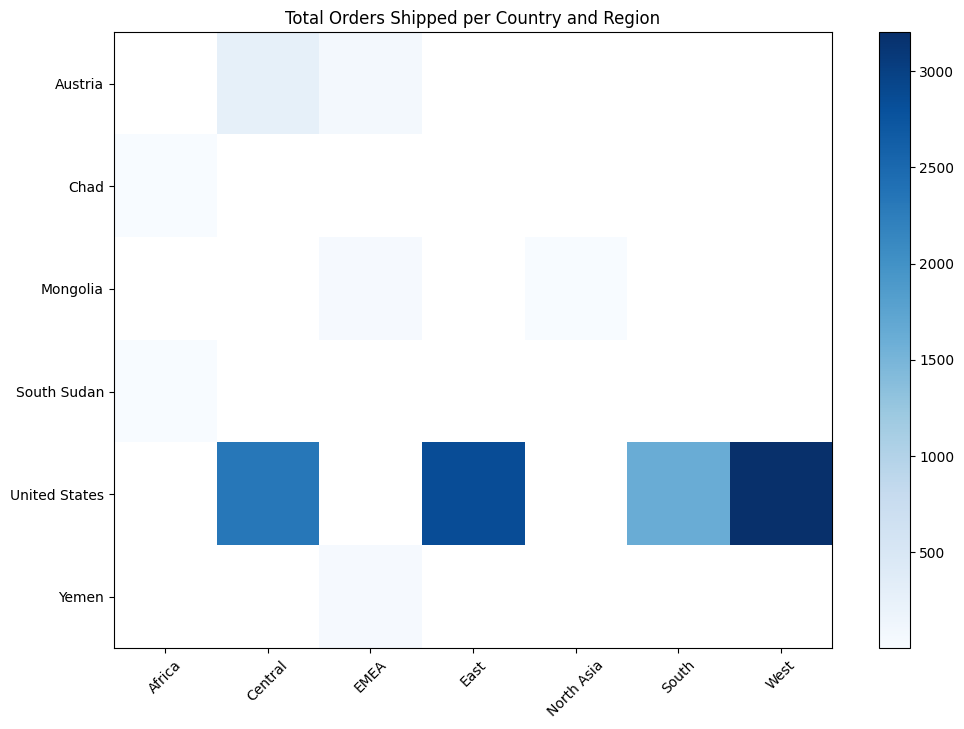

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import pyspark.sql.functions as F

# run the query and convert the result to pandas dataframe
result_df = spark.sql('SELECT Country, Region, COUNT(*) AS TotalOrders FROM store GROUP BY Country, Region '
                      'ORDER BY TotalOrders DESC').toPandas()

# filter the result to the top 6 countries
top_countries = result_df['Country'].value_counts().head(6).index
result_df = result_df[result_df['Country'].isin(top_countries)]

# pivot the result to get a matrix of country and region
pivoted_df = result_df.pivot(index='Country', columns='Region', values='TotalOrders')

# create a heatmap using matplotlib
fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(pivoted_df, cmap='Blues')

# set the tick labels and title
ax.set_xticks(range(len(pivoted_df.columns)))
ax.set_yticks(range(len(pivoted_df.index)))
ax.set_xticklabels(pivoted_df.columns, rotation=45)
ax.set_yticklabels(pivoted_df.index)
ax.set_title('Total Orders Shipped per Country and Region')

# add the colorbar and show the plot
cbar = ax.figure.colorbar(im, ax=ax)
plt.show()

In [12]:
#5.Find the total profit made per category and sub-category
spark.sql('SELECT Category, Sub_Category, SUM(Profit) AS TotalProfit FROM store GROUP BY Category, Sub_Category').show()

+---------------+------------+------------------+
|       Category|Sub_Category|       TotalProfit|
+---------------+------------+------------------+
|Office Supplies|  Appliances|141680.58940000008|
|Office Supplies|   Envelopes|29098.208699999996|
|      Furniture|      Chairs|140396.26750000002|
|Office Supplies|     Storage|       108712.5717|
|Office Supplies|       Paper| 57949.67439999999|
|Office Supplies|    Supplies| 22424.99709999999|
|     Technology|     Copiers|258567.54817999998|
|Office Supplies|         Art|        57953.9109|
|Office Supplies|     Binders| 72266.90400000004|
|     Technology| Accessories|129626.30619999992|
|Office Supplies|   Fasteners|11518.543700000002|
|      Furniture|   Bookcases|161924.41950000005|
|     Technology|      Phones|216650.35429999995|
|Office Supplies|      Labels|15010.511999999992|
|     Technology|    Machines|58867.872999999985|
|      Furniture|      Tables|-64083.38870000001|
|      Furniture| Furnishings|48202.579900000004|


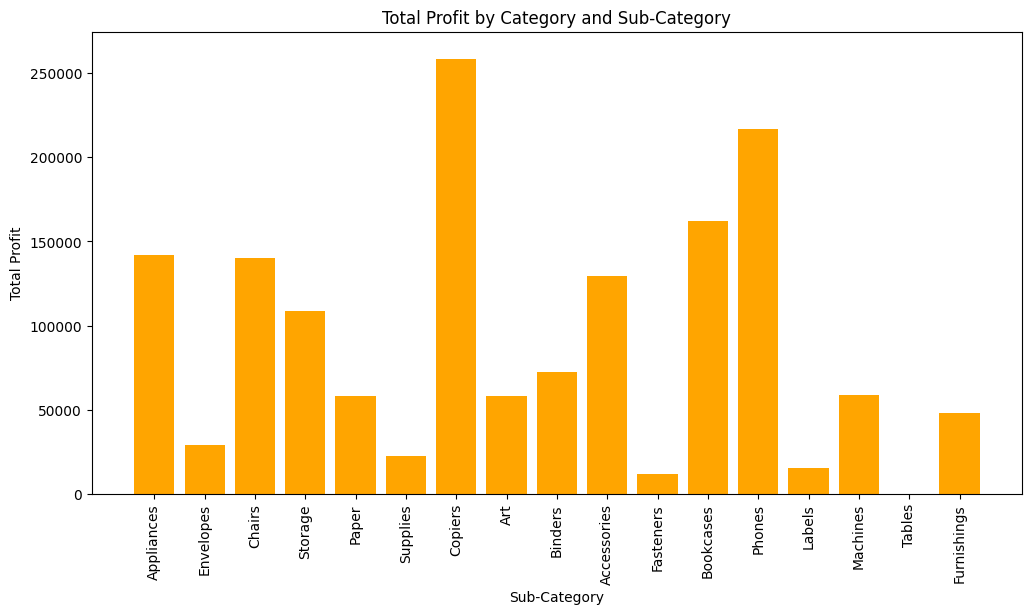

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import col

# Assuming you already have spark and store dataframe

# Run the SQL query and convert the resulting dataframe to pandas dataframe
df = spark.sql('SELECT Category, Sub_Category, SUM(Profit) AS TotalProfit FROM store GROUP BY Category, Sub_Category').toPandas()

# Create a bar chart of the total profit made per category and sub-category
plt.figure(figsize=(12, 6))
plt.bar(df['Sub_Category'], df['TotalProfit'], color='orange')
plt.title('Total Profit by Category and Sub-Category')
plt.xlabel('Sub-Category')
plt.xticks(rotation=90)
plt.ylabel('Total Profit')
plt.ylim(0)
plt.show()

In [13]:
#6.Find the average discount rate for each product category:
spark.sql('SELECT Category, AVG(Discount) AS AvgDiscount FROM store GROUP BY Category').show()

+---------------+-------------------+
|       Category|        AvgDiscount|
+---------------+-------------------+
|Office Supplies| 0.1827976974736188|
|      Furniture|0.18208654235914123|
|     Technology| 0.1386754757913414|
+---------------+-------------------+



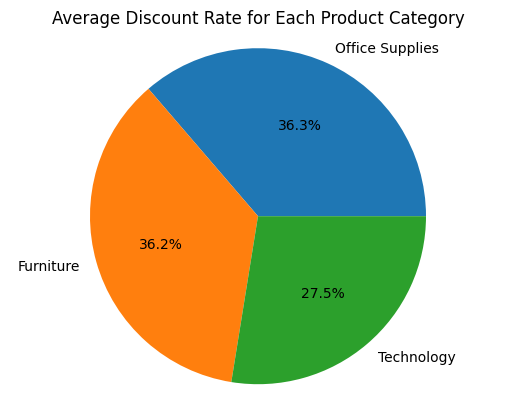

In [30]:
import matplotlib.pyplot as plt

# Run the SQL query
result = spark.sql('SELECT Category, AVG(Discount) AS AvgDiscount FROM store GROUP BY Category')

# Convert the result to a pandas dataframe
df = result.toPandas()

# Plot a pie chart of average discount rate for each product category
plt.pie(df['AvgDiscount'], labels=df['Category'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Average Discount Rate for Each Product Category')
plt.show()

In [14]:
#7.Find the total profit made in each market
spark.sql('SELECT Market, SUM(Profit) AS TotalProfit FROM store GROUP BY Market').show()

+------+------------------+
|Market|       TotalProfit|
+------+------------------+
|Africa| 88871.63100000001|
| LATAM|221643.48707999976|
|  APAC| 436000.0490000002|
|    US|285707.60219999973|
|Canada|          17817.39|
|  EMEA|43897.971000000005|
|    EU| 372829.7414999994|
+------+------------------+



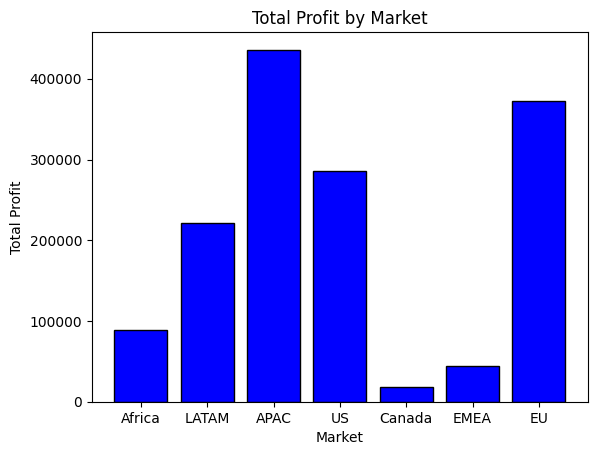

In [32]:
# Import required libraries
import matplotlib.pyplot as plt

# Run the SQL query and store the results in a Pandas DataFrame
results_df = spark.sql('SELECT Market, SUM(Profit) AS TotalProfit FROM store GROUP BY Market').toPandas()

# Create a stacked bar chart with Market as x-axis and Total Profit as y-axis
plt.bar(results_df['Market'], results_df['TotalProfit'], color='blue', edgecolor='black')

# Set title and axis labels
plt.title('Total Profit by Market')
plt.xlabel('Market')
plt.ylabel('Total Profit')

# Display the plot
plt.show()

In [15]:
#8.Find the number of orders shipped per customer for customers who have placed more than 5 orders
spark.sql('SELECT Customer_ID, COUNT(*) AS TotalOrders FROM store GROUP BY Customer_ID HAVING COUNT(*) > 5').show()

+-----------+-----------+
|Customer_ID|TotalOrders|
+-----------+-----------+
|   RR-19315|         44|
|   PB-19210|         61|
|    KN-6705|         11|
|   VW-21775|         57|
|    DB-3660|          7|
|   EM-13960|         85|
|   MS-17530|         47|
|   MY-17380|         50|
|    NB-8655|          9|
|    ML-7395|         13|
|    RB-9570|         12|
|    JF-5565|         18|
|    CS-2250|         12|
|   KH-16630|         45|
|   BD-11500|         41|
|   AH-10690|         66|
|   TC-11475|         18|
|   SW-20275|         58|
|    MC-8130|          8|
|    KF-6285|         22|
+-----------+-----------+
only showing top 20 rows



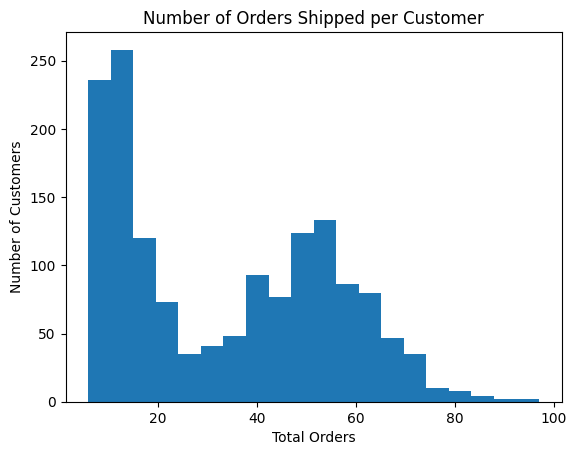

In [33]:
import matplotlib.pyplot as plt

# Run the SQL query and store the results in a Pandas DataFrame
results_df = spark.sql('SELECT Customer_ID, COUNT(*) AS TotalOrders FROM store GROUP BY Customer_ID HAVING COUNT(*) > 5').toPandas()

# Create a histogram with Total Orders as x-axis and the number of customers as y-axis
plt.hist(results_df['TotalOrders'], bins=20)

# Set title and axis labels
plt.title('Number of Orders Shipped per Customer')
plt.xlabel('Total Orders')
plt.ylabel('Number of Customers')

# Display the plot
plt.show()

In [16]:
#9.Find the total sales made by each sub-category in the office supplies category
spark.sql('SELECT Sub_Category, SUM(Sales) AS TotalSales FROM store WHERE Category = "Office Supplies" GROUP BY Sub_Category').show()

+------------+------------------+
|Sub_Category|        TotalSales|
+------------+------------------+
|   Envelopes|169767.38959999994|
|         Art|       372091.9659|
|    Supplies|242353.15259999977|
|   Fasteners| 83226.69190000002|
|     Binders|458404.48970000015|
|      Labels| 73404.02999999997|
|       Paper|       241168.6314|
|     Storage|1120045.4654000003|
|  Appliances|1011064.3050000006|
+------------+------------------+



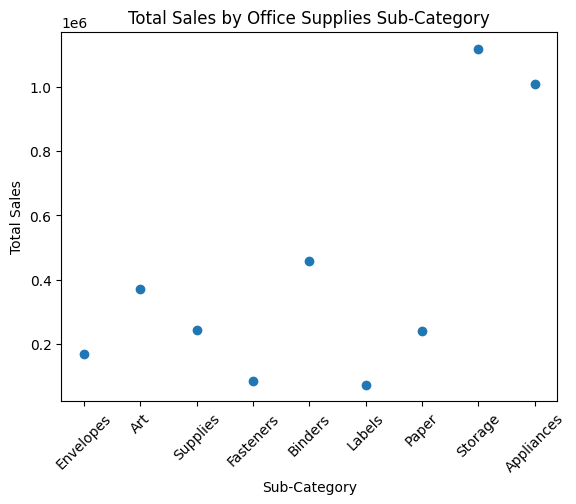

In [36]:
import matplotlib.pyplot as plt

# Run the SQL query and store the results in a Pandas DataFrame
results_df = spark.sql('SELECT Sub_Category, SUM(Sales) AS TotalSales FROM store WHERE Category = "Office Supplies" GROUP BY Sub_Category').toPandas()

# Create a scatter plot with Sub-Category as x-axis and Total Sales as y-axis
plt.scatter(results_df['Sub_Category'], results_df['TotalSales'])

# Set title and axis labels
plt.title('Total Sales by Office Supplies Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [17]:
#10.Find the top 5 customers by total profit
spark.sql('SELECT Customer_ID, SUM(Profit) AS TotalProfit FROM store GROUP BY Customer_ID ORDER BY TotalProfit DESC LIMIT 5').show()

+-----------+-----------------+
|Customer_ID|      TotalProfit|
+-----------+-----------------+
|   TC-20980|8770.633600000001|
|   RB-19360|8523.951500000001|
|   SC-20095|        8106.2179|
|   BE-11335|7790.696299999999|
|   HL-15040|7657.501779999999|
+-----------+-----------------+



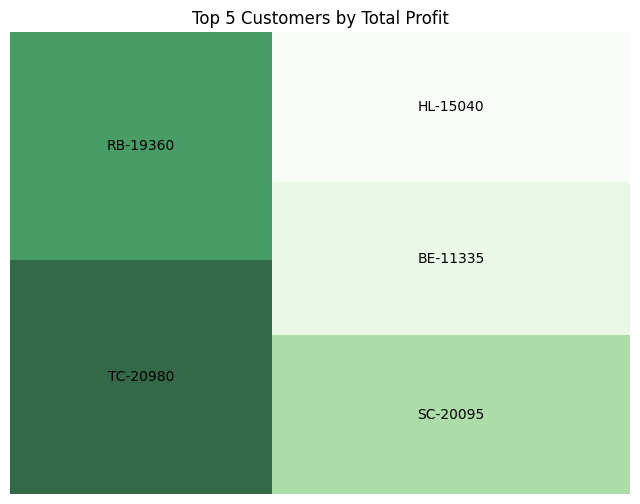

In [39]:
import sys
# !{sys.executable} -m pip install squarify
import matplotlib.pyplot as plt
import squarify

# Run the SQL query and store the results in a Pandas DataFrame
results_df = spark.sql('SELECT Customer_ID, SUM(Profit) AS TotalProfit FROM store GROUP BY Customer_ID ORDER BY TotalProfit DESC LIMIT 5').toPandas()

# Set the color map
cmap = plt.cm.Greens

# Normalize the profit values for color mapping
min_profit, max_profit = results_df['TotalProfit'].min(), results_df['TotalProfit'].max()
norm = plt.Normalize(min_profit, max_profit)

# Assign colors to each customer based on profit
colors = [cmap(norm(value)) for value in results_df['TotalProfit']]

# Create the treemap using squarify library
plt.figure(figsize=(8, 6))
squarify.plot(sizes=results_df['TotalProfit'], label=results_df['Customer_ID'], color=colors, alpha=0.8)

# Set title and axis labels
plt.title('Top 5 Customers by Total Profit')
plt.axis('off')

# Display the plot
plt.show()